In [43]:
#pandas libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import random

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import Normalizer

%run "../notebooks/cargar_df.ipynb"

### Cargo los data frames con los features

In [8]:
trainX = pd.read_csv('../files_csv/train_173_features_bin_encoding')
trainX

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval_0,Bureaucratic_Code_0_Approval_1,Bureaucratic_Code_0_Approved_0,Bureaucratic_Code_0_Approved_1,bureaucratic_aprobada,amount_ids,...,Total_Amount_Currency_2,Total_Amount_Currency_3,Total_Taxable_Amount_Currency_0,Total_Taxable_Amount_Currency_1,Total_Taxable_Amount_Currency_2,Total_Taxable_Amount_Currency_3,ASP,ASP_(converted),Total_Amount_USD,Stage
0,0,1,1,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0.5200,0.58817,5.609362e+06,0
1,1,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0.5300,0.59948,5.130851e+04,1
2,2,0,0,1,1,0,1,0,1,0,...,1,0,0,0,1,0,0.4800,0.48000,8.386560e+04,1
3,3,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0.5300,0.53000,7.421882e+06,0
4,4,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0.5300,0.53000,1.335719e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,12799,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0.5150,0.58251,4.273404e+05,1
9787,12800,1,0,0,1,0,1,0,1,1,...,1,0,0,0,1,0,0.5300,0.53000,1.066625e+07,0
9788,12801,1,1,1,0,1,0,1,1,1,...,0,1,0,0,0,1,0.5200,0.58817,1.062819e+05,1
9789,12802,1,1,1,0,1,0,1,1,0,...,1,0,0,0,1,0,0.6375,0.63750,2.346797e+06,0


In [10]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9791 entries, 0 to 9790
Columns: 174 entries, Opportunity_ID to Stage
dtypes: float64(3), int64(171)
memory usage: 13.0 MB


In [11]:
testX = pd.read_csv('../files_csv/test_173_features_bin_encoding')
testX

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval_0,Bureaucratic_Code_0_Approval_1,Bureaucratic_Code_0_Approved_0,Bureaucratic_Code_0_Approved_1,bureaucratic_aprobada,amount_ids,...,Total_Amount_Currency_1,Total_Amount_Currency_2,Total_Amount_Currency_3,Total_Taxable_Amount_Currency_0,Total_Taxable_Amount_Currency_1,Total_Taxable_Amount_Currency_2,Total_Taxable_Amount_Currency_3,ASP,ASP_(converted),Total_Amount_USD
0,10689,1,1,1,0,1,0,1,1,1,...,0,0,1,0,0,0,1,0.306667,0.346870,137147.816349
1,10690,1,1,1,0,1,0,1,1,1,...,0,0,1,0,0,0,1,0.332000,0.375524,169716.349384
2,10691,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.425000,0.425000,21037.500000
3,10692,1,1,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0.425000,0.425000,361517.750000
4,10693,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.390000,0.390000,5752.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,12364,1,1,1,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0.300000,0.300000,73875.000000
1563,12365,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.410000,0.410000,45054.900000
1564,12366,1,1,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0.410000,0.410000,100122.000000
1565,12367,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.500000,0.500000,143220.000000


In [12]:
testX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 173 entries, Opportunity_ID to Total_Amount_USD
dtypes: float64(3), int64(170)
memory usage: 2.1 MB


### Me quedo con los features mas importantes para predecir

In [23]:
# Agrego una columna con numeros random para ver cuales features son peores que los random

In [36]:
s = pd.Series('Random')

for i in range (0, trainX.Opportunity_ID.size):
    s[i] = random.randint(0,10000)
s

0       1340
1       8641
2        815
3        760
4       2130
        ... 
9786     326
9787    8256
9788    8711
9789     290
9790    5402
Length: 9791, dtype: object

In [37]:
trainX['Random'] = s.astype('int64')

In [39]:
s = pd.Series('Random')

for i in range (0, testX.Opportunity_ID.size):
    s[i] = random.randint(0,9999)
s

0        848
1       7668
2       2188
3       1356
4       4743
        ... 
1562    1529
1563     461
1564    9139
1565     306
1566    9644
Length: 1567, dtype: object

In [40]:
testX['Random'] = s.astype('int64')

In [41]:
y = trainX['Stage']
y

0       0
1       1
2       1
3       0
4       0
       ..
9786    1
9787    0
9788    1
9789    0
9790    0
Name: Stage, Length: 9791, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = \
    train_test_split(trainX, y, test_size=0.2, random_state=123)

In [55]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(trainX, y, test_size=0.2, random_state=123)

xgb_reg = xgb.XGBRegressor(objective = 'binary:logistic', \
                           colsample_bytree = 0.3, \
                           learning_rate = 0.1, \
                           max_depth = 5, \
                           alpha = 10, \
                           n_estimators = 10, \
                           eval_metric='logloss')
xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)
ll = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (ll))

Log Loss: 0.536722


In [56]:
# Feature importances
xgb_reg.feature_importances_

array([0.00076944, 0.00233274, 0.        , 0.        , 0.01890662,
       0.00108803, 0.        , 0.05970907, 0.00366148, 0.00683518,
       0.01470022, 0.        , 0.02622915, 0.03402312, 0.02088992,
       0.06418451, 0.        , 0.        , 0.00048594, 0.00444731,
       0.        , 0.        , 0.        , 0.00316007, 0.00203623,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00016123, 0.        , 0.        , 0.        , 0.00242783,
       0.07899194, 0.05100683, 0.        , 0.00043051, 0.        ,
       0.        , 0.00444024, 0.        , 0.        , 0.        ,
       0.00015164, 0.        , 0.        , 0.        , 0.04033459,
       0.        , 0.00328362, 0.01062185, 0.02807458, 0.01009319,
       0.        , 0.0033028 , 0.00741231, 0.        , 0.00344479,
       0.        , 0.00172581, 0.        , 0.00201477, 0.01436569,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [57]:
feature_imp_xgboost = pd.DataFrame({'feature':X_train.columns, 'value':xgb_reg.feature_importances_})

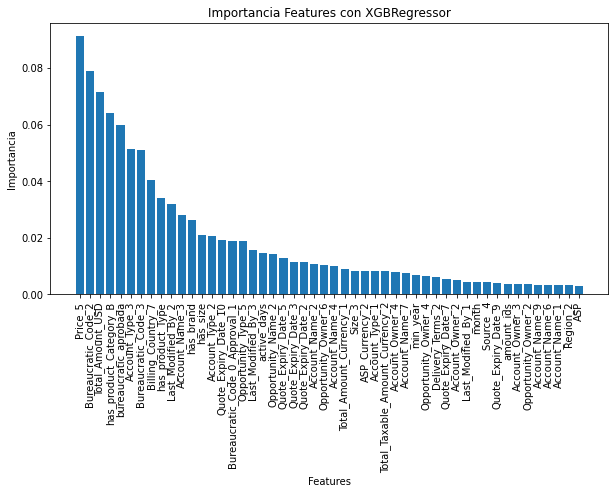

In [58]:
df = feature_imp_xgboost.sort_values('value').nlargest(50, 'value')

plt.figure(figsize=(10,5))
plt.bar(df.feature, df.value, )
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con XGBRegressor')
plt.show()

In [59]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=5)

rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

loss = log_loss(y_test, preds)
print("Loss: %f" % (loss))

Loss: 1.036700


In [60]:
tree0 = rf_model.estimators_[0]

In [61]:
feature_imp_tree = pd.DataFrame({'feature':X_train.columns, 'value':tree0.feature_importances_})

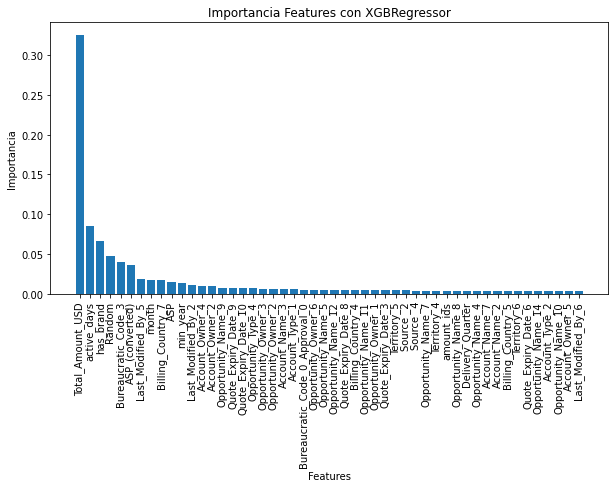

In [62]:
df = feature_imp_tree.sort_values('value').nlargest(50, 'value')

plt.figure(figsize=(10,5))
plt.bar(df.feature, df.value, )
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con XGBRegressor')
plt.show()

In [63]:
# Los features mas importantes de random_forest estan incluidos en los de Xgboost
best_features = feature_imp_xgboost.nlargest(50, 'value').feature
best_features

133                            Price_5
35                 Bureaucratic_Code_2
171                   Total_Amount_USD
15              has_product_Category_B
7                bureaucratic_aprobada
94                      Account_Type_3
36                 Bureaucratic_Code_3
49                   Billing_Country_7
13                    has_product_Type
152                 Last_Modified_By_2
53                      Account_Name_3
12                           has_brand
14                            has_size
93                      Account_Type_2
148               Quote_Expiry_Date_10
4       Bureaucratic_Code_0_Approval_1
100                 Opportunity_Type_5
153                 Last_Modified_By_3
10                         active_days
64                  Opportunity_Name_2
143                Quote_Expiry_Date_5
141                Quote_Expiry_Date_3
140                Quote_Expiry_Date_2
52                      Account_Name_2
90                 Opportunity_Owner_6
54                      A

In [64]:
trainX[best_features]

,Price_5,Bureaucratic_Code_2,Total_Amount_USD,has_product_Category_B,bureaucratic_aprobada,Account_Type_3,Bureaucratic_Code_3,Billing_Country_7,has_product_Type,Last_Modified_By_2,...,Source _4,Quote_Expiry_Date_9,amount_ids,Account_Owner_3,Opportunity_Owner_2,Account_Name_9,Account_Name_6,Account_Name_1,Region_2,ASP
0,0,0,15.539948,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0.5200
1,0,0,10.845631,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0.5300
2,0,0,11.336983,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0.4800
3,1,1,15.819943,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0.5300
4,1,1,16.407566,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0.5300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11353,0,0,12.965339,1,1,1,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0.5150
11354,0,1,16.182563,1,1,0,0,1,1,0,...,1,0,1,1,0,0,1,0,1,0.5300
11355,0,0,11.572641,1,1,0,1,0,1,0,...,0,1,1,1,0,0,1,1,0,0.5200
11356,0,0,14.668562,1,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0.6375


In [65]:
# Normalizo las filas

transformer = Normalizer().fit(trainX[best_features])
transformed_train = transformer.transform(trainX[best_features]).copy()
transformed_train

array([[0.        , 0.        , 0.00767439, ..., 0.        , 0.        ,
        0.0002568 ],
       [0.        , 0.        , 0.00537868, ..., 0.        , 0.        ,
        0.00026284],
       [0.        , 0.        , 0.00556375, ..., 0.        , 0.00049076,
        0.00023557],
       ...,
       [0.        , 0.        , 0.00573879, ..., 0.00049589, 0.        ,
        0.00025786],
       [0.        , 0.        , 0.00727379, ..., 0.        , 0.00049588,
        0.00031612],
       [0.        , 0.        , 0.00837011, ..., 0.        , 0.00049068,
        0.00031403]])

In [66]:
# Normalizo las filas
transformer = Normalizer().fit(testX[best_features])
transformed_test = transformer.transform(testX[best_features])
transformed_test

array([[0.        , 0.        , 0.00583728, ..., 0.        , 0.        ,
        0.00015189],
       [0.        , 0.        , 0.0059425 , ..., 0.        , 0.        ,
        0.00016443],
       [0.        , 0.        , 0.00493007, ..., 0.00049528, 0.00049528,
        0.00021049],
       ...,
       [0.        , 0.        , 0.00570272, ..., 0.00049528, 0.00049528,
        0.00020306],
       [0.        , 0.        , 0.00588004, ..., 0.00049528, 0.00049528,
        0.00024764],
       [0.        , 0.00049528, 0.00683015, ..., 0.        , 0.        ,
        0.00014363]])

Optimal number of features: 2
Selected features: ['Total_Amount_USD', 'active_days']


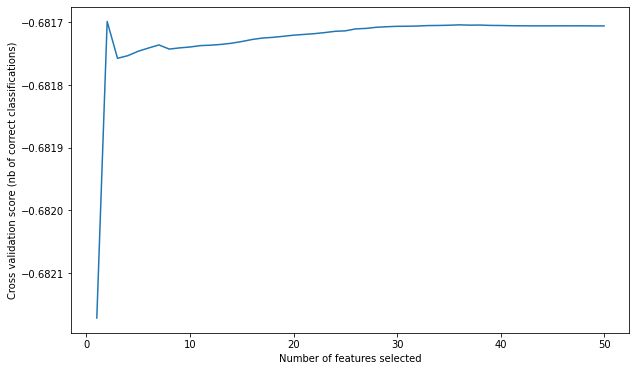

In [71]:
# RFECV Recursive Feature Elimination Cross Validation
# Para determinar cuales features aportan informacion

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='neg_log_loss')
rfecv.fit(transformed_train, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(trainX[best_features].columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.title('Cantidad de features segun el score')
plt.xlabel('Number of features selected')
plt.ylabel('Neg Log Loss Score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Pruebo si los features para el error accuracy son los mismos

Optimal number of features: 14
Selected features: ['Bureaucratic_Code_2', 'Total_Amount_USD', 'has_product_Category_B', 'bureaucratic_aprobada', 'Bureaucratic_Code_3', 'Billing_Country_7', 'has_product_Type', 'Last_Modified_By_2', 'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1', 'Opportunity_Type_5', 'active_days', 'month']


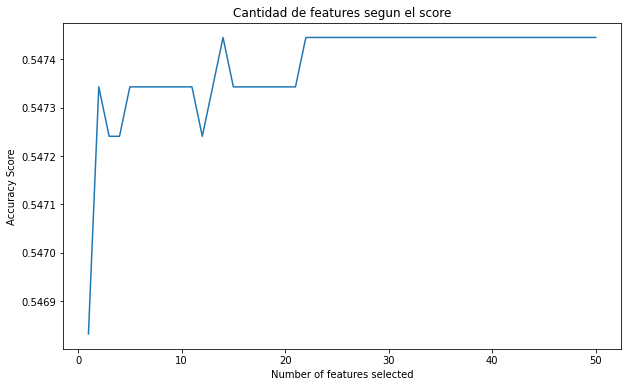

In [72]:
# RFECV Recursive Feature Elimination Cross Validation
# Para determinar cuales features aportan informacion

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(transformed_train, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(trainX[best_features].columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.title('Cantidad de features segun el score')
plt.xlabel('Number of features selected')
plt.ylabel('Accuracy Score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [74]:
# Set the parameters by cross-validation
# Para los mejores features segun log loss

tuned_parameters = [{#'penalty': ['l1', 'l2', 'none'],
                     'tol': [0.0001, 0.0002, 0.00005],
                     'C': [0.5, 0.8, 1.0, 1.2],
                     'fit_intercept': [True, False],
                     'class_weight': [None, 'balanced'],
                     #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                     'max_iter': [200, 300], 
                     #'multi_class': ['auto', 'ovr', 'multinomial'], 
                     'warm_start': [False, True]
    }]

score = 'log_loss'
print("Tuning hyper-parameters for %s with Logistic Regression\n" % score)

X_train, X_test, y_train, y_test = \
    train_test_split(trainX[['Total_Amount_USD', 'active_days']],\
                     y, test_size=0.2, random_state=123)

model = LogisticRegression()
clf = GridSearchCV(model, tuned_parameters, cv=10)
clf.fit(X_train, y_train)

print("Best Params:")
print(clf.best_params_ )
print()
print('Best Score:')
print(clf.best_score_)

Tuning hyper-parameters for log_loss with Logistic Regression

Best Params:
{'C': 0.5, 'class_weight': None, 'fit_intercept': True, 'max_iter': 200, 'tol': 0.0001, 'warm_start': False}

Best Score:
0.6910149021294341


In [77]:
# Set the parameters by cross-validation
# Normalizando los features

tuned_parameters = [{#'penalty': ['l1', 'l2', 'none'],
                     'tol': [0.0001, 0.0002, 0.00005],
                     'C': [0.5, 0.8, 1.0, 1.2],
                     'fit_intercept': [True, False],
                     'class_weight': [None, 'balanced'],
                     #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                     'max_iter': [200, 300], 
                     #'multi_class': ['auto', 'ovr', 'multinomial'], 
                     'warm_start': [False, True]
    }]

score = 'log_loss'
print("Tuning hyper-parameters for %s with Logistic Regression\n" % score)

transformer = Normalizer().fit(trainX[['Total_Amount_USD', 'active_days']])
transformed_train2 = transformer.transform(trainX[['Total_Amount_USD', 'active_days']])
transformed_train2

X_train, X_test, y_train, y_test = \
    train_test_split(transformed_train2, y, test_size=0.2, random_state=123)

model = LogisticRegression()
clf = GridSearchCV(model, tuned_parameters, cv=10)
clf.fit(X_train, y_train)

print("Best Params:")
print(clf.best_params_ )
print()
print('Best Score:')
print(clf.best_score_)

Tuning hyper-parameters for log_loss with Logistic Regression

Best Params:
{'C': 1.2, 'class_weight': None, 'fit_intercept': True, 'max_iter': 200, 'tol': 0.0001, 'warm_start': False}

Best Score:
0.5688233051841427


In [78]:
# Set the parameters by cross-validation
# Para los mejores features segun accuracy
# Normalizando los features

tuned_parameters = [{#'penalty': ['l1', 'l2', 'none'],
                     'tol': [0.0001, 0.0002, 0.00005],
                     'C': [0.5, 0.8, 1.0, 1.2],
                     'fit_intercept': [True, False],
                     'class_weight': [None, 'balanced'],
                     #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                     'max_iter': [200, 300], 
                     #'multi_class': ['auto', 'ovr', 'multinomial'], 
                     'warm_start': [False, True]
    }]

score = 'log_loss'
print("Tuning hyper-parameters for %s with Logistic Regression\n" % score)

transformer = Normalizer().fit(trainX[['Bureaucratic_Code_2', 'Total_Amount_USD', \
                             'has_product_Category_B', 'bureaucratic_aprobada',\
                             'Bureaucratic_Code_3', 'Billing_Country_7', \
                             'has_product_Type', 'Last_Modified_By_2', \
                             'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1',\
                             'Opportunity_Type_5', 'active_days', 'month']])
transformed_train3 = transformer.transform(trainX[['Bureaucratic_Code_2', 'Total_Amount_USD', \
                             'has_product_Category_B', 'bureaucratic_aprobada',\
                             'Bureaucratic_Code_3', 'Billing_Country_7', \
                             'has_product_Type', 'Last_Modified_By_2', \
                             'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1',\
                             'Opportunity_Type_5', 'active_days', 'month']])
transformed_train3

X_train, X_test, y_train, y_test = \
    train_test_split(transformed_train3, y, test_size=0.2, random_state=123)

model = LogisticRegression()
clf = GridSearchCV(model, tuned_parameters, cv=10)
clf.fit(X_train, y_train)

print("Best Params:")
print(clf.best_params_ )
print()
print('Best Score:')
print(clf.best_score_)

Tuning hyper-parameters for log_loss with Logistic Regression

Best Params:
{'C': 1.2, 'class_weight': None, 'fit_intercept': True, 'max_iter': 200, 'tol': 0.0001, 'warm_start': False}

Best Score:
0.6359835600907029


In [115]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(transformed_train2, y, test_size=0.15, random_state=123)

model = LogisticRegression(C = 1.2, \
                           class_weight = None, \
                           fit_intercept = True, \
                           max_iter = 200, \
                           tol = 0.0001, \
                           warm_start = False)
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)
ll = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (ll))

Log Loss: 0.647463


In [116]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(transformed_train3, y, test_size=0.15, random_state=123)

model = LogisticRegression(C = 1.2, \
                           class_weight = None, \
                           fit_intercept = True, \
                           max_iter = 200, \
                           tol = 0.0001, \
                           warm_start = False)
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)
ll = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (ll))

Log Loss: 0.605149


In [117]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(trainX[['Total_Amount_USD', 'active_days',]], y, test_size=0.15, random_state=123)

model = LogisticRegression(C = 1.2, \
                           class_weight = None, \
                           fit_intercept = True, \
                           max_iter = 200, \
                           tol = 0.0001, \
                           warm_start = False)
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)
ll = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (ll))

Log Loss: 0.599634


In [120]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(trainX[['Bureaucratic_Code_2', 'Total_Amount_USD', \
                             'has_product_Category_B', 'bureaucratic_aprobada',\
                             'Bureaucratic_Code_3', 'Billing_Country_7', \
                             'has_product_Type', 'Last_Modified_By_2', \
                             'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1',\
                             'Opportunity_Type_5', 'active_days', 'month']], y, test_size=0.15, random_state=123)

model = LogisticRegression(C = 1.2, \
                           class_weight = None, \
                           fit_intercept = True, \
                           max_iter = 200, \
                           tol = 0.0001, \
                           warm_start = False)
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)
ll = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (ll))

Log Loss: 0.493301


/home/cecilia/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### El menor error log loss lo obtuve utilizando los features mas importantes de la metrica accuracy y sin normalizarlos

In [121]:
preds

array([[0.38746736, 0.61253264],
       [0.41586409, 0.58413591],
       [0.37128662, 0.62871338],
       ...,
       [0.23137864, 0.76862136],
       [0.36897576, 0.63102424],
       [0.6169354 , 0.3830646 ]])

In [125]:
log_loss(y_test, pd.DataFrame(preds)[[1]], normalize=True)

0.49330132820973194

In [129]:
pd.Series(y_test).value_counts()

1    746
0    723
Name: Stage, dtype: int64

In [139]:
pd.crosstab(y_test, model.predict(X_test), rownames=['Observed'], colnames=['Predicted'])

Predicted,0,1
Observed,,
0,482,241
1,127,619


In [211]:
kf = KFold(n_splits=6, shuffle=True)

k_fold_train = trainX[['Bureaucratic_Code_2', 'Total_Amount_USD', \
                             'has_product_Category_B', 'bureaucratic_aprobada',\
                             'Bureaucratic_Code_3', 'Billing_Country_7', \
                             'has_product_Type', 'Last_Modified_By_2', \
                             'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1',\
                             'Opportunity_Type_5', 'active_days', 'month']]

losses = []
y_trained = pd.Series()
y_preds = pd.Series()

for train_index, test_index in kf.split(k_fold_train):
    X_train, X_test = k_fold_train.iloc[train_index], k_fold_train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(C = 1.2, \
                           class_weight = None, \
                           fit_intercept = True, \
                           max_iter = 200, \
                           tol = 0.0001, \
                           warm_start = False)
    model.fit(X_train, y_train)
    
    proba = model.predict_proba(X_test)
    loss = log_loss(y_test, pd.DataFrame(proba)[[1]])
    print("Log loss: %f" % (loss))
    losses.append(loss)
    
    preds = model.predict(X_test)
    y_preds = pd.concat([y_preds, pd.Series(preds)])
    y_trained = pd.concat([y_trained, y_test])
    
print('Promedio losses: %f' % np.mean(losses))

/home/cecilia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()
/home/cecilia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':
/home/cecilia/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Log loss: 0.509210


/home/cecilia/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.501094


/home/cecilia/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.517949


/home/cecilia/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.522638


/home/cecilia/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.503437
Log loss: 0.522865
Promedio losses: 0.512865


/home/cecilia/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [212]:
y_trained = y_trained.reset_index()[[0]]
y_trained.columns = ['Target']
y_trained = pd.Series(y_trained.Target)
y_trained

0       0
1       0
2       1
3       1
4       0
       ..
9786    1
9787    1
9788    1
9789    1
9790    0
Name: Target, Length: 9791, dtype: int64

In [213]:
y_preds = y_preds.reset_index()[[0]]
y_preds.columns = ['Target']
y_preds = pd.Series(y_preds.Target)
y_preds

0       1
1       1
2       0
3       1
4       0
       ..
9786    1
9787    1
9788    1
9789    1
9790    0
Name: Target, Length: 9791, dtype: int64

In [217]:
pd.crosstab(y_trained,\
            y_preds,\
            rownames=['Observed'], colnames=['Predicted'])

Predicted,0,1
Observed,,
0,3134,1585
1,962,4110


In [215]:
y.value_counts()

1    5072
0    4719
Name: Stage, dtype: int64

El target 1 correcto obtuvo el 80% de aciertos

El target 0 correcto obtuvo el 66% de aciertos

In [ ]:
# Set the parameters by random search
tuned_parameters = [{'penalty': ['l1', 'l2', 'none'],
                     'tol': [0.0001, 0.0002, 0.00005],
                     #'C': [0.5, 0.8, 1.0, 1.2],
                     'C': uniform(loc=0, scale=4),
                     'fit_intercept': [True, False],
                     'class_weight': [None, 'balanced'],
                     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                     'max_iter': [200, 300, 400], 
                     'multi_class': 'ovr', 
                     'warm_start': [False, True]
    }]

score = 'log_loss'
print("Tuning hyper-parameters for %s with Logistic Regression\n" % score)

transformer = Normalizer().fit(trainX[['Bureaucratic_Code_2', 'Total_Amount_USD', \
                             'has_product_Category_B', 'bureaucratic_aprobada',\
                             'Bureaucratic_Code_3', 'Billing_Country_7', \
                             'has_product_Type', 'Last_Modified_By_2', \
                             'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1',\
                             'Opportunity_Type_5', 'active_days', 'month']])
transformed_train3 = transformer.transform(trainX[['Bureaucratic_Code_2', 'Total_Amount_USD', \
                             'has_product_Category_B', 'bureaucratic_aprobada',\
                             'Bureaucratic_Code_3', 'Billing_Country_7', \
                             'has_product_Type', 'Last_Modified_By_2', \
                             'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1',\
                             'Opportunity_Type_5', 'active_days', 'month']])
transformed_train3


from scipy.stats import uniform
logistic = LogisticRegression()
clf = RandomizedSearchCV(logistic, tuned_parameters, \
                         random_state=123, scoring='neg_log_loss',\
                         n_iter=50)
search = clf.fit(transformed_train3, y)

print("Best Params:")
print(search.best_params_ )
print()
print('Best Score:')
print(search.best_score_)

Muchos errores de convergencia, el resultado fue: 

Best Params:
{'C': 0.9313437199439143, 'class_weight': None, 'fit_intercept': True, 'max_iter': 200, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0002, 'warm_start': True}

Best Score:
-0.5712577860321202


In [228]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(trainX[['Bureaucratic_Code_2', 'Total_Amount_USD', \
                             'has_product_Category_B', 'bureaucratic_aprobada',\
                             'Bureaucratic_Code_3', 'Billing_Country_7', \
                             'has_product_Type', 'Last_Modified_By_2', \
                             'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1',\
                             'Opportunity_Type_5', 'active_days', 'month']], y, test_size=0.15, random_state=123)

model = LogisticRegression(C = 0.93, \
                           class_weight = None, \
                           fit_intercept = True, \
                           max_iter = 200, \
                           multi_class = 'ovr',\
                           penalty = 'l1',\
                           solver = 'liblinear',\
                           tol = 0.0002, \
                           warm_start = True)

model.fit(X_train, y_train)
preds = model.predict_proba(X_test)
ll = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (ll))

Log Loss: 0.490239


In [229]:
train_logistic = trainX[['Bureaucratic_Code_2', 'Total_Amount_USD', \
                             'has_product_Category_B', 'bureaucratic_aprobada',\
                             'Bureaucratic_Code_3', 'Billing_Country_7', \
                             'has_product_Type', 'Last_Modified_By_2', \
                             'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1',\
                             'Opportunity_Type_5', 'active_days', 'month']]

In [230]:
test_logistic = testX[['Bureaucratic_Code_2', 'Total_Amount_USD', \
                             'has_product_Category_B', 'bureaucratic_aprobada',\
                             'Bureaucratic_Code_3', 'Billing_Country_7', \
                             'has_product_Type', 'Last_Modified_By_2', \
                             'Account_Name_3', 'has_brand', 'Bureaucratic_Code_0_Approval_1',\
                             'Opportunity_Type_5', 'active_days', 'month']]

In [233]:
model = LogisticRegression(C = 0.93, \
                           class_weight = None, \
                           fit_intercept = True, \
                           max_iter = 200, \
                           multi_class = 'ovr',\
                           penalty = 'l1',\
                           solver = 'liblinear',\
                           tol = 0.0002, \
                           warm_start = True)


model.fit(train_logistic, y)
preds = model.predict_proba(test_logistic)

In [234]:
preds

array([[0.44614057, 0.55385943],
       [0.46765708, 0.53234292],
       [0.14265566, 0.85734434],
       ...,
       [0.47937396, 0.52062604],
       [0.22803605, 0.77196395],
       [0.82155715, 0.17844285]])

In [235]:
preds.shape

(1567, 2)

In [242]:
pd.DataFrame(preds)[1]

0       0.553859
1       0.532343
2       0.857344
3       0.439151
4       0.844420
          ...   
1562    0.726062
1563    0.650495
1564    0.520626
1565    0.771964
1566    0.178443
Name: 1, Length: 1567, dtype: float64

In [243]:
ids = test.Opportunity_ID.unique()
prediccion = pd.DataFrame({'Opportunity_ID':ids, 'Target':pd.DataFrame(preds)[1]})
prediccion

,Opportunity_ID,Target
0,10689,0.553859
1,10690,0.532343
2,10691,0.857344
3,10692,0.439151
4,10693,0.844420
...,...,...
1562,12364,0.726062
1563,12365,0.650495
1564,12366,0.520626
1565,12367,0.771964


In [244]:
prediccion.to_csv('prediccion_logistic_regression_3', index=False)